<a href="https://colab.research.google.com/github/ikbalsingh/cs276/blob/main/QuestionA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Movie Graph creation and visualization

Create a movie graph, where nodes are the movies and edges connect movies done by the same director

Download dataset



In [1]:
import requests
import zipfile
import os

def download_and_extract_zip(url):
    # Send an HTTP GET request to the URL
    response = requests.get(url)

    if response.status_code == 200:
        # Request was successful, save the content to a local .zip file
        with open("downloaded_file.zip", "wb") as file:
            file.write(response.content)

        # Extract the .zip file
        with zipfile.ZipFile("downloaded_file.zip", 'r') as zip_ref:
            zip_ref.extractall()  # Extract the contents of the zip file to the current directory

        # Remove the downloaded .zip file
        os.remove("downloaded_file.zip")

        print(f"File extracted and saved.")
    else:
        print(f"Failed to download the .zip file. Status code: {response.status_code}")

# Usage
download_and_extract_zip("http://mozart.diei.unipg.it/gdcontest/contest2021/data/uploads/movie_remakes.zip")


File extracted and saved.


In [2]:
import pandas as pd
remakes_edges_df = pd.read_csv('remakes_edges.csv', encoding='latin-1', delimiter=';', error_bad_lines=False)
remakes_edges_df

<ipython-input-2-265a90e65092>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  remakes_edges_df = pd.read_csv('remakes_edges.csv', encoding='latin-1', delimiter=';', error_bad_lines=False)


,director_original,director_remake,title_original,year_original,title_remake,year_remake
0,1,86,Don Juan,1926,Adventures of Don Juan,1948
1,48,46,Pépé le Moko,1937,Algiers,1938
2,56,20,All Quiet on the Western Front,1930,All Quiet on the Western Front,1979
3,45,42,Assault on Precinct 13,1976,Assault on Precinct 13,2005
4,37,30,Little Mother,1935,Bachelor Mother,1939
...,...,...,...,...,...,...
97,33,12,The More the Merrier,1943,Walk Don't Run,1966
98,32,21,The Women,1939,The Women,2008
99,32,17,The Women,1939,The Opposite Sex,1956
100,8,63,The Major and the Minor,1942,You're Never Too Young,1955


In [3]:
import pandas
remakes_nodes_df = pd.read_csv('remakes_nodes.csv', encoding='latin-1', delimiter=';', error_bad_lines=False)
remakes_nodes_df

<ipython-input-3-7755e794e150>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  remakes_nodes_df = pd.read_csv('remakes_nodes.csv', encoding='latin-1', delimiter=';', error_bad_lines=False)


,id,name
0,1,Alan Crosland
1,2,Alfred Hitchcock
2,3,Andrew Davis
3,4,Andrew Grieve
4,5,Anthony Asquith
...,...,...
86,87,W. S. Van Dyke
87,88,Wilhelm Thiele
88,89,William A. Wellman
89,90,William Nigh


Combine year with names to distinguish between the same movie names of different years

In [4]:
movies_with_years_df = remakes_edges_df.copy()  # Create a copy of the original DataFrame

# Combine 'title_original' and 'year_original' into a new column
movies_with_years_df['original_title_and_year'] = movies_with_years_df['title_original'] + ' (' + movies_with_years_df['year_original'].astype(str) + ')'
movies_with_years_df['remake_title_and_year'] = movies_with_years_df['title_remake'] + ' (' + movies_with_years_df['year_remake'].astype(str) + ')'

movies_with_years_df

,director_original,director_remake,title_original,year_original,title_remake,year_remake,original_title_and_year,remake_title_and_year
0,1,86,Don Juan,1926,Adventures of Don Juan,1948,Don Juan (1926),Adventures of Don Juan (1948)
1,48,46,Pépé le Moko,1937,Algiers,1938,Pépé le Moko (1937),Algiers (1938)
2,56,20,All Quiet on the Western Front,1930,All Quiet on the Western Front,1979,All Quiet on the Western Front (1930),All Quiet on the Western Front (1979)
3,45,42,Assault on Precinct 13,1976,Assault on Precinct 13,2005,Assault on Precinct 13 (1976),Assault on Precinct 13 (2005)
4,37,30,Little Mother,1935,Bachelor Mother,1939,Little Mother (1935),Bachelor Mother (1939)
...,...,...,...,...,...,...,...,...
97,33,12,The More the Merrier,1943,Walk Don't Run,1966,The More the Merrier (1943),Walk Don't Run (1966)
98,32,21,The Women,1939,The Women,2008,The Women (1939),The Women (2008)
99,32,17,The Women,1939,The Opposite Sex,1956,The Women (1939),The Opposite Sex (1956)
100,8,63,The Major and the Minor,1942,You're Never Too Young,1955,The Major and the Minor (1942),You're Never Too Young (1955)


#### Graph creation

Movie graph, where nodes are the movies and edges connect movies done by the same director

In [5]:
import networkx as nx

# Create a NetworkX graph
G = nx.Graph()

# Add nodes for movies
for index, row in movies_with_years_df.iterrows():
    G.add_node(row['original_title_and_year'], label=row['original_title_and_year'])
    G.add_node(row['remake_title_and_year'], label=row['remake_title_and_year'])

director_movie_mapping = {}
names = {}
# Add edges for movies directed by the same director
for id, name in zip(remakes_nodes_df['id'],remakes_nodes_df['name']):
    names[id] = name
    director_movie_mapping[id] = set()
    for index, row in movies_with_years_df.iterrows():
        if row['director_original'] == id:
            director_movie_mapping[id].add( row['original_title_and_year'])
        if row['director_remake'] == id:
            director_movie_mapping[id].add( row['remake_title_and_year'])

for key, value in director_movie_mapping.items():
    if(len(value) > 1):
        for i in value:
            for k in value:
               if i!= k:
                  G.add_edge(i,k, label=names[key])

## Graph Visualization

#### Seperate K values in spring_layout by degree

The same colors represent movies directed by same director.

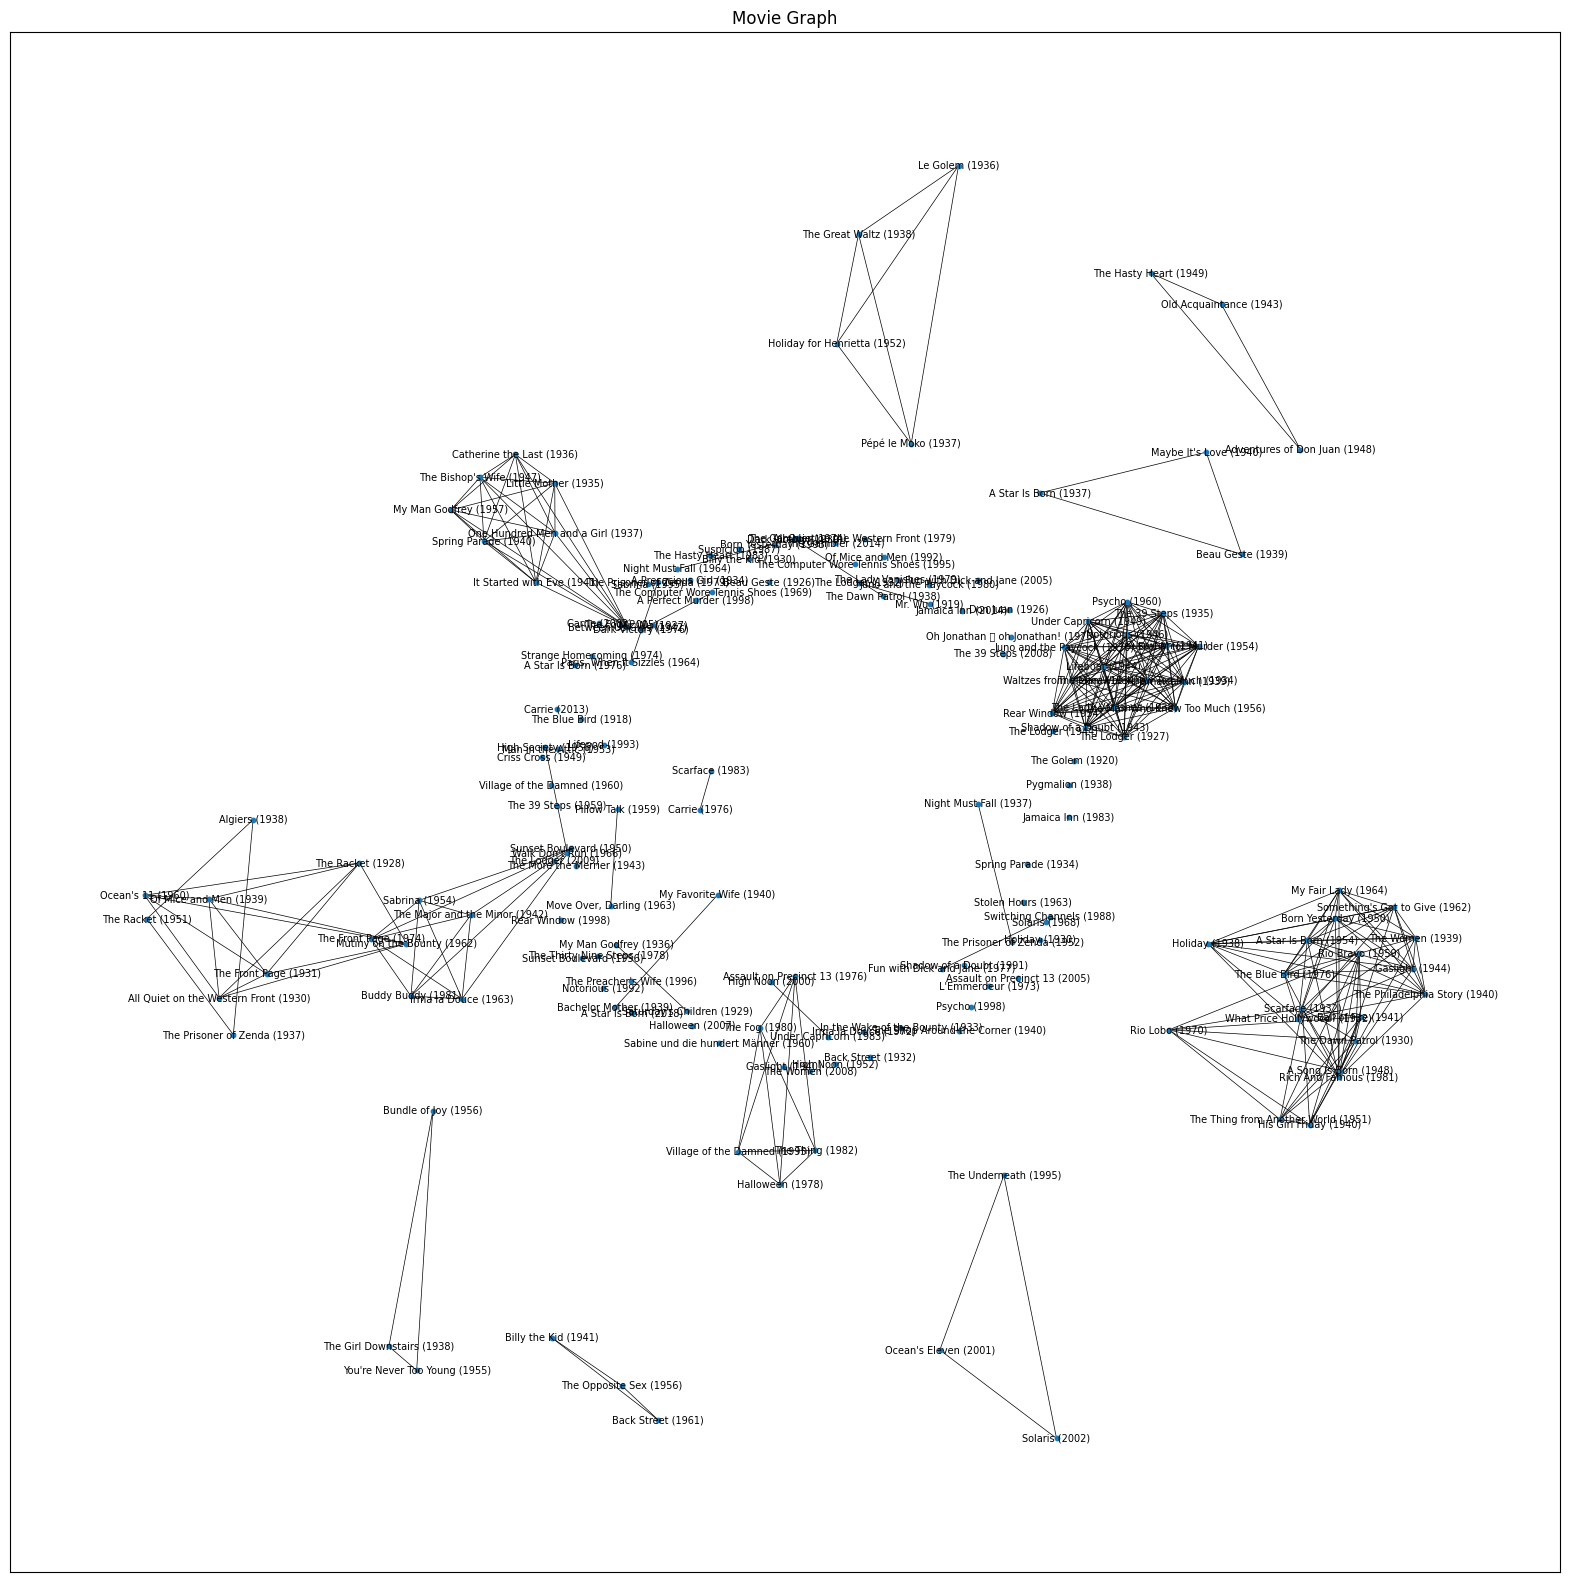

In [7]:
import matplotlib.pyplot as plt

components = list(nx.connected_components(G))

k_values = {}

default_k = 0.4

high_degree_k = 1.0

# Determine 'k' values for each component
for component in components:
    # Calculate the degree of the component
    component_degree = G.subgraph(component).degree()

    # If the maximum degree in the component is greater than 3, set 'k' to 'high_degree_k'
    if max(dict(component_degree).values()) > 1:
        k_values.update({node: high_degree_k for node in component})
    else:
        k_values.update({node: default_k for node in component})

# Use the 'k' values to draw the graph with spring layout
pos = nx.spring_layout(G, k=default_k)


# Adjust the 'k' values for nodes in the layout
for node in pos:
    pos[node][0] *= k_values[node]
    pos[node][1] *= k_values[node]

plt.figure(figsize=(20, 20))  # Adjust the figure size as needed
ax = plt.gca()
ax.set_facecolor('white')

nx.draw_networkx_nodes(G, pos, node_size=10)

nx.draw_networkx_edges(G, pos, width=0.5, edge_color='black')

node_labels = {node: data.get("label", "") for node, data in G.nodes(data=True)}
nx.draw_networkx_labels(G, pos=pos, font_size=7)


# Turn off axis labels and display the plot
ax.set_xticks([])  # Turn off x-axis labels
ax.set_yticks([])  # Turn off y-axis labels
plt.title('Movie Graph')

plt.show()





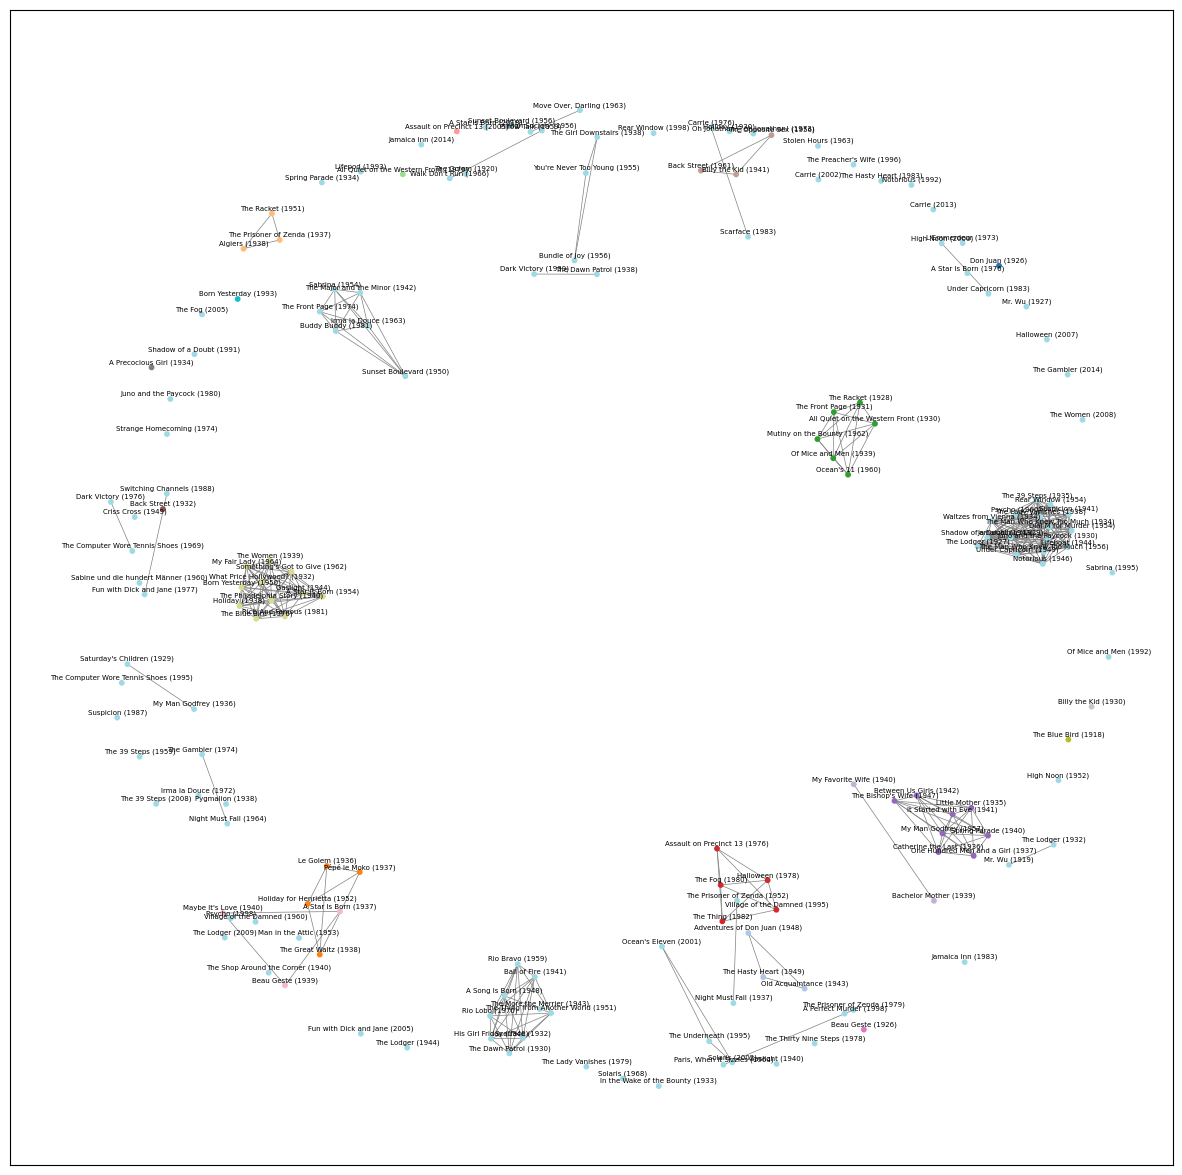

In [8]:

def plot_graph_networkx(G, pos, node_size=10, node_label_size = 5, show_edge_labels = False, edge_label_size=4):
    # node_colors = [G.nodes[node]['color'] for node in G.nodes()]
    plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
    ax = plt.gca()
    ax.set_facecolor('white')

    # Define a colormap for coloring components
    cmap = plt.get_cmap('tab20')

    components = list(nx.connected_components(G))

    # Create a dictionary to map nodes to colors
    node_colors = {}
    for i, component in enumerate(components):
        color = cmap(i % 87)  # You can adjust the number of colors as needed
        for node in component:
            node_colors[node] = color

    # Draw nodes with desired node color
    # nx.draw_networkx_nodes(G, pos,  node_color=node_colors, node_size=10)
    nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color = [node_colors[node] for node in G.nodes()])

    # Draw edges with a specific edge width and color
    nx.draw_networkx_edges(G, pos, width=0.5, edge_color='grey')

    # Add labels for nodes
    node_labels = {node: data.get("label", "") for node, data in G.nodes(data=True)}
    nx.draw_networkx_labels(G, {k: (x, y + 0.01) for k, (x, y) in pos.items()}, font_size=node_label_size)

    # # Add labels for edges
    if show_edge_labels:
        edge_labels = {(u, v): data.get("label", "") for u, v, data in G.edges(data=True)}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=edge_label_size, font_color='red')

    # Turn off axis labels and display the plot
    ax.set_xticks([])  # Turn off x-axis labels
    ax.set_yticks([])  # Turn off y-axis labels
    plt.show()

pos = nx.spring_layout(G, k=0.5,iterations=100)
plot_graph_networkx(G, pos)


#### Interactive visualization using Plotly library

It is also possible to zoom and pan the space. Refer the legend on the right side of the plot.

In [10]:
import plotly.graph_objects as go


node_x = []
node_y = []

for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

edge_x = []
edge_y = []

for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.25, color='#888'),
    hoverinfo='text',
    mode='lines')

node_trace = go.Scatter(
    x=[pos[node][0] for node in G.nodes()],
    y=[pos[node][1] for node in G.nodes()],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=False,  # Do not use a colorscale
        size=5,
        colorbar=dict(
            thickness=15,
            title='Node Department',
            xanchor='left',
            titleside='right'
        )
    )
)

# Add node labels if you want
node_text = list(G.nodes())
node_trace.text = node_text
layout = go.Layout(
    showlegend=False,
    hovermode='closest',
    margin=dict(b=0, l=0, r=0, t=0),
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    # width=20*40,  # 20 by 20 figure size (20 units per inch)
    height=20*40,
)

fig = go.Figure(data=[edge_trace, node_trace], layout=layout)
fig.show()

#### Visualising nodes with degree > 5

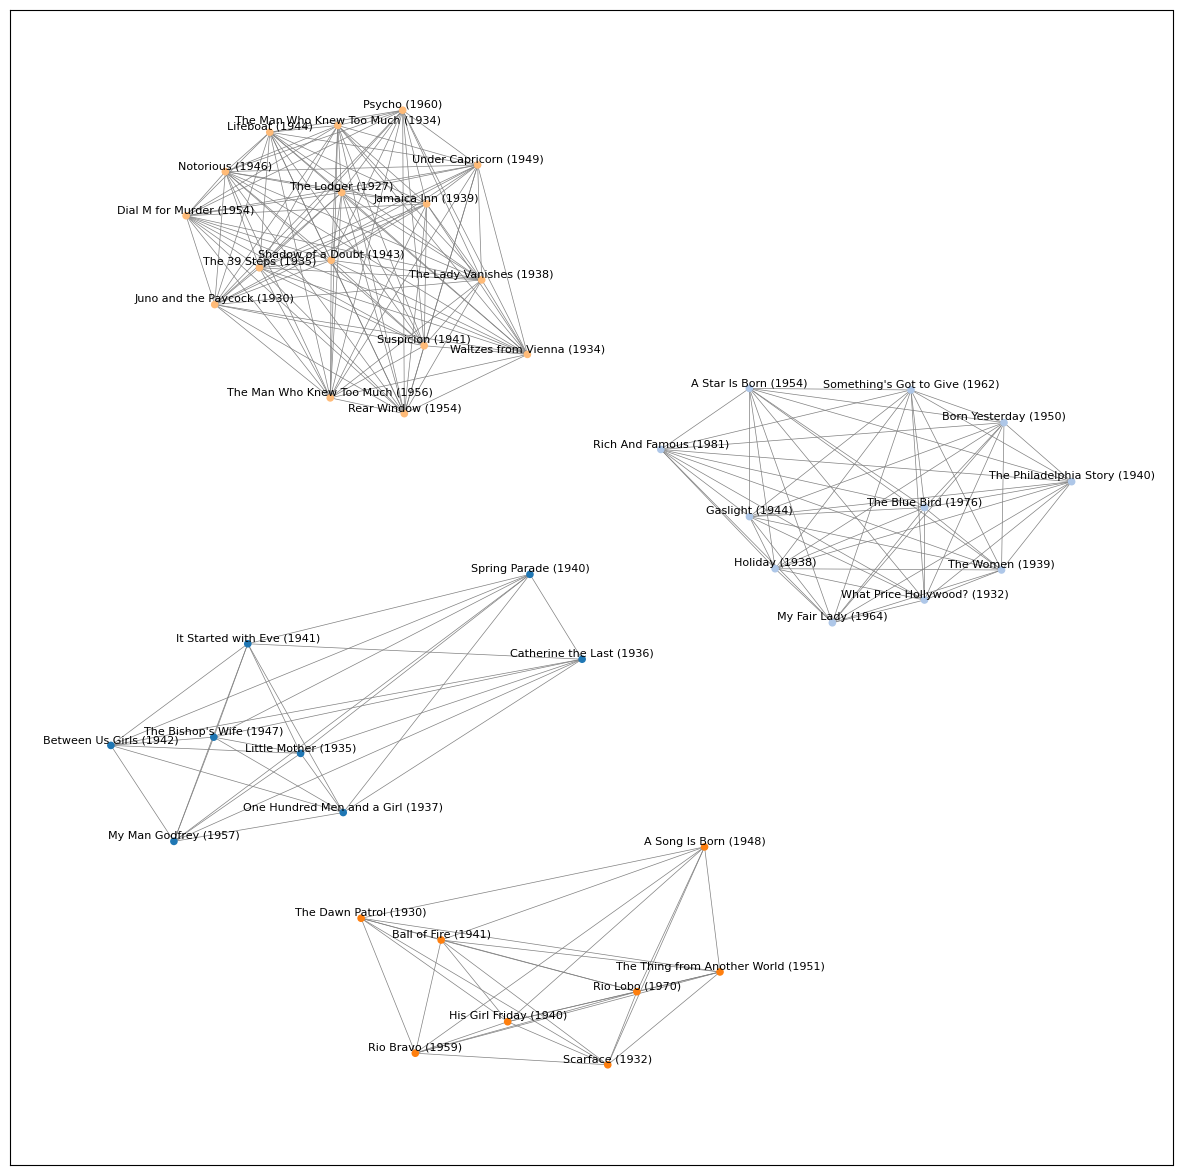

In [11]:
G_copy = G.copy()

# Find nodes with degree greater than 2
nodes_to_remove = [node for node, degree in dict(G_copy.degree()).items() if degree < 6]

# Remove the selected nodes
G_copy.remove_nodes_from(nodes_to_remove)

plot_graph_networkx(G_copy, pos = nx.spring_layout(G_copy, k=1), node_size=20,  node_label_size = 8)

#### Visualising nodes with degree between 3 and 4 where edges label the name of the director

147


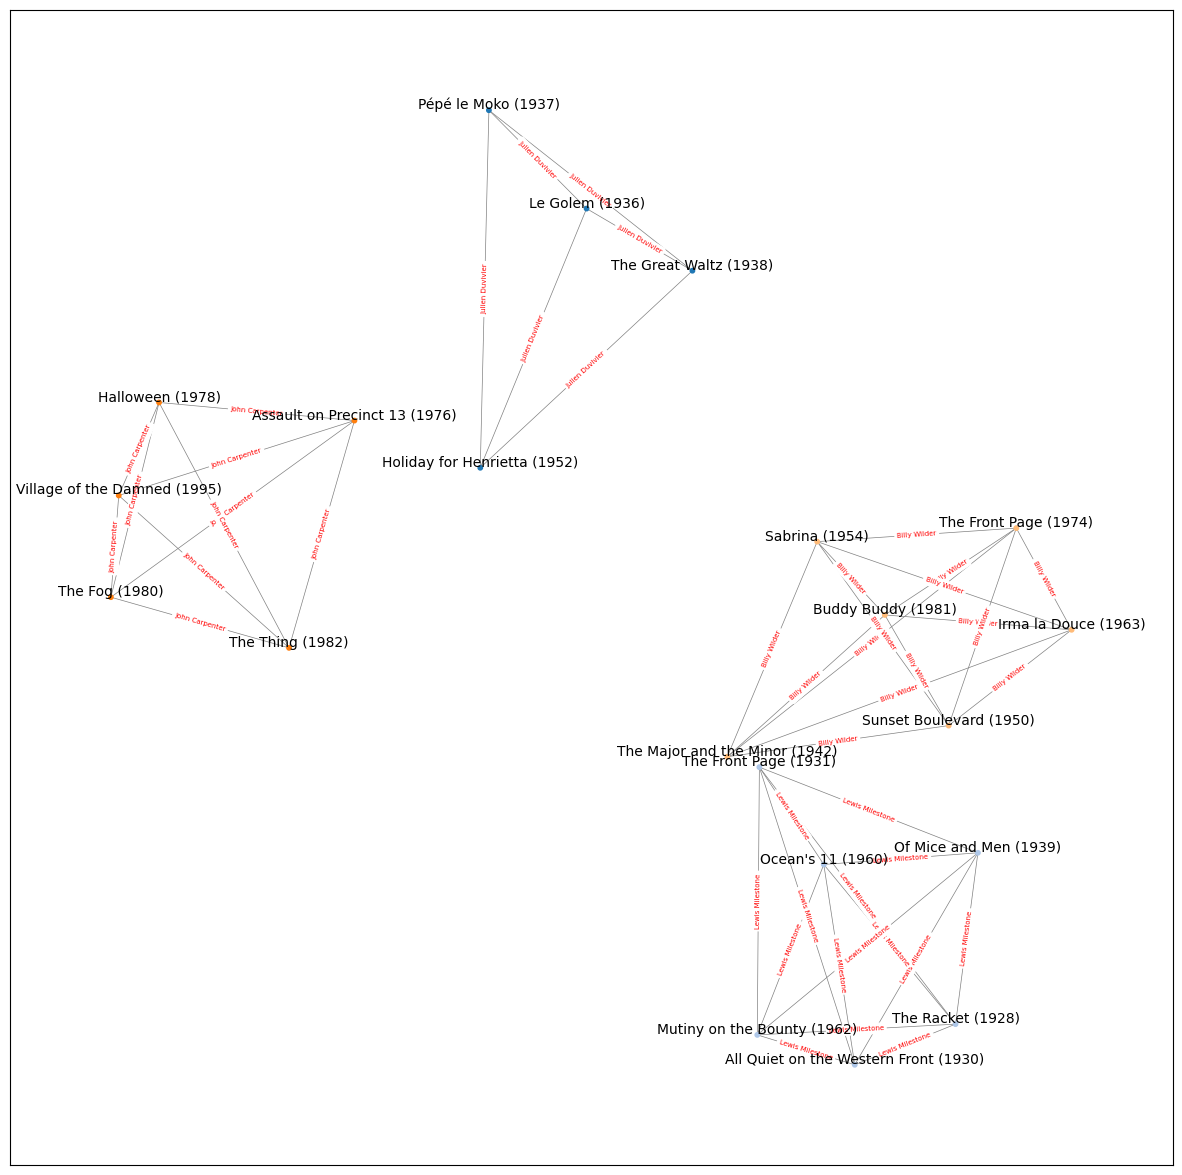

In [12]:
G_copy_2 = G.copy()

# Find nodes with degree greater than 2
nodes_to_remove = [node for node, degree in dict(G_copy_2.degree()).items() if (degree < 3 or degree > 5)]
print(len(nodes_to_remove))
# Remove the selected nodes
G_copy_2.remove_nodes_from(nodes_to_remove)

plot_graph_networkx(G_copy_2, pos = nx.spring_layout(G_copy_2, k=1),  node_label_size = 10, show_edge_labels = True, edge_label_size= 5)

#### Visualising nodes with degree 2

150


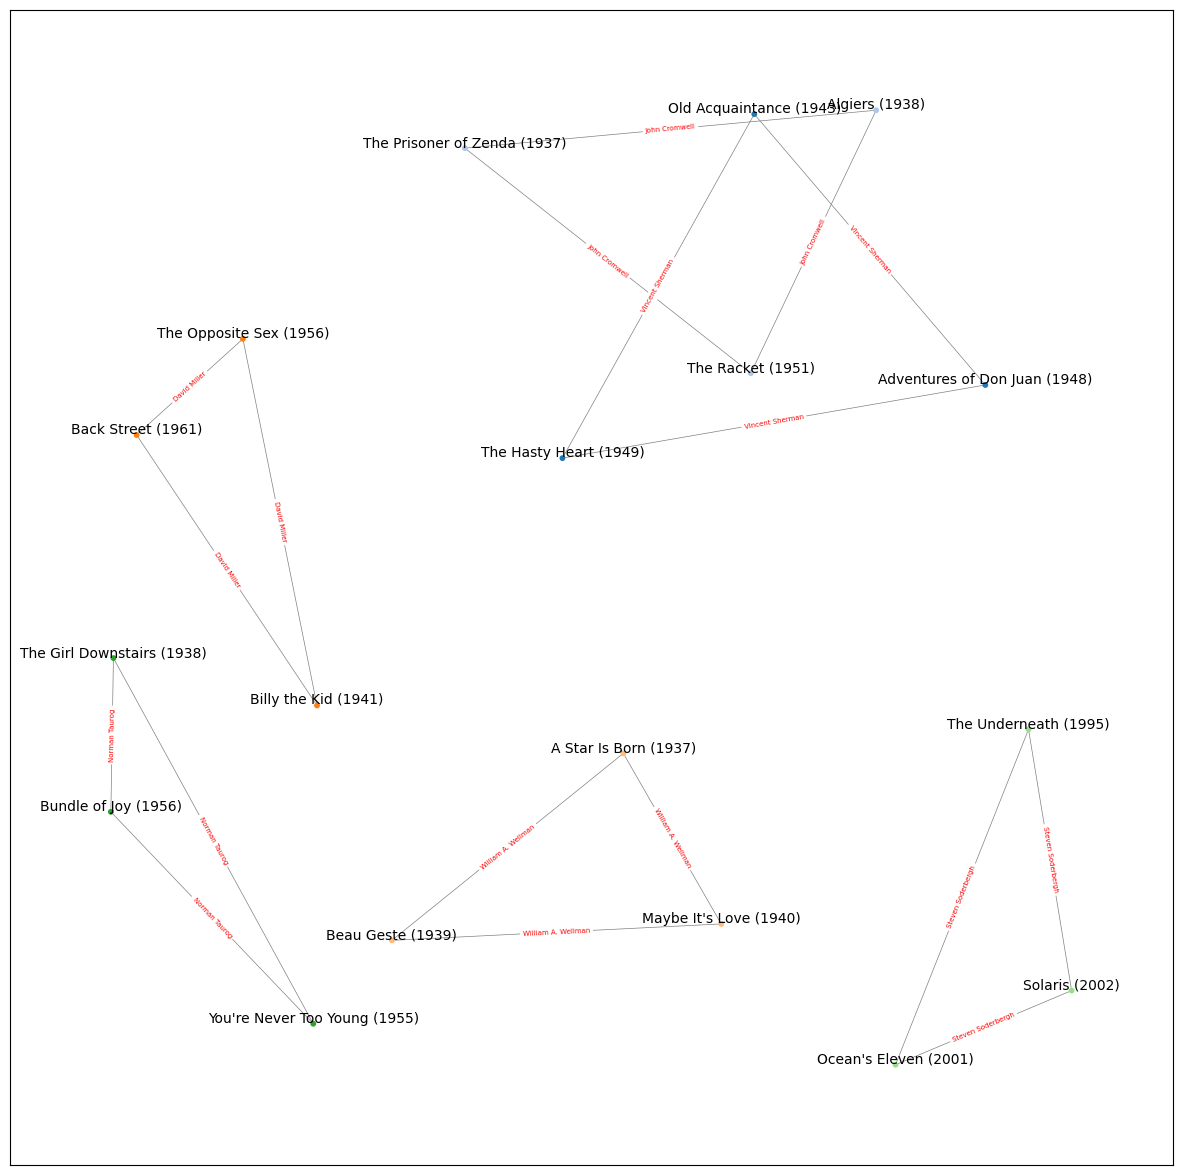

In [13]:
G_copy_3 = G.copy()

# Find nodes with degree greater than 2
nodes_to_remove = [node for node, degree in dict(G_copy_3.degree()).items() if ( degree != 2)]
print(len(nodes_to_remove))
# Remove the selected nodes
G_copy_3.remove_nodes_from(nodes_to_remove)

plot_graph_networkx(G_copy_3, pos = nx.spring_layout(G_copy_3, k=1),  node_label_size = 10,  show_edge_labels = True, edge_label_size=5)

#### Visualising nodes with degree 1

142


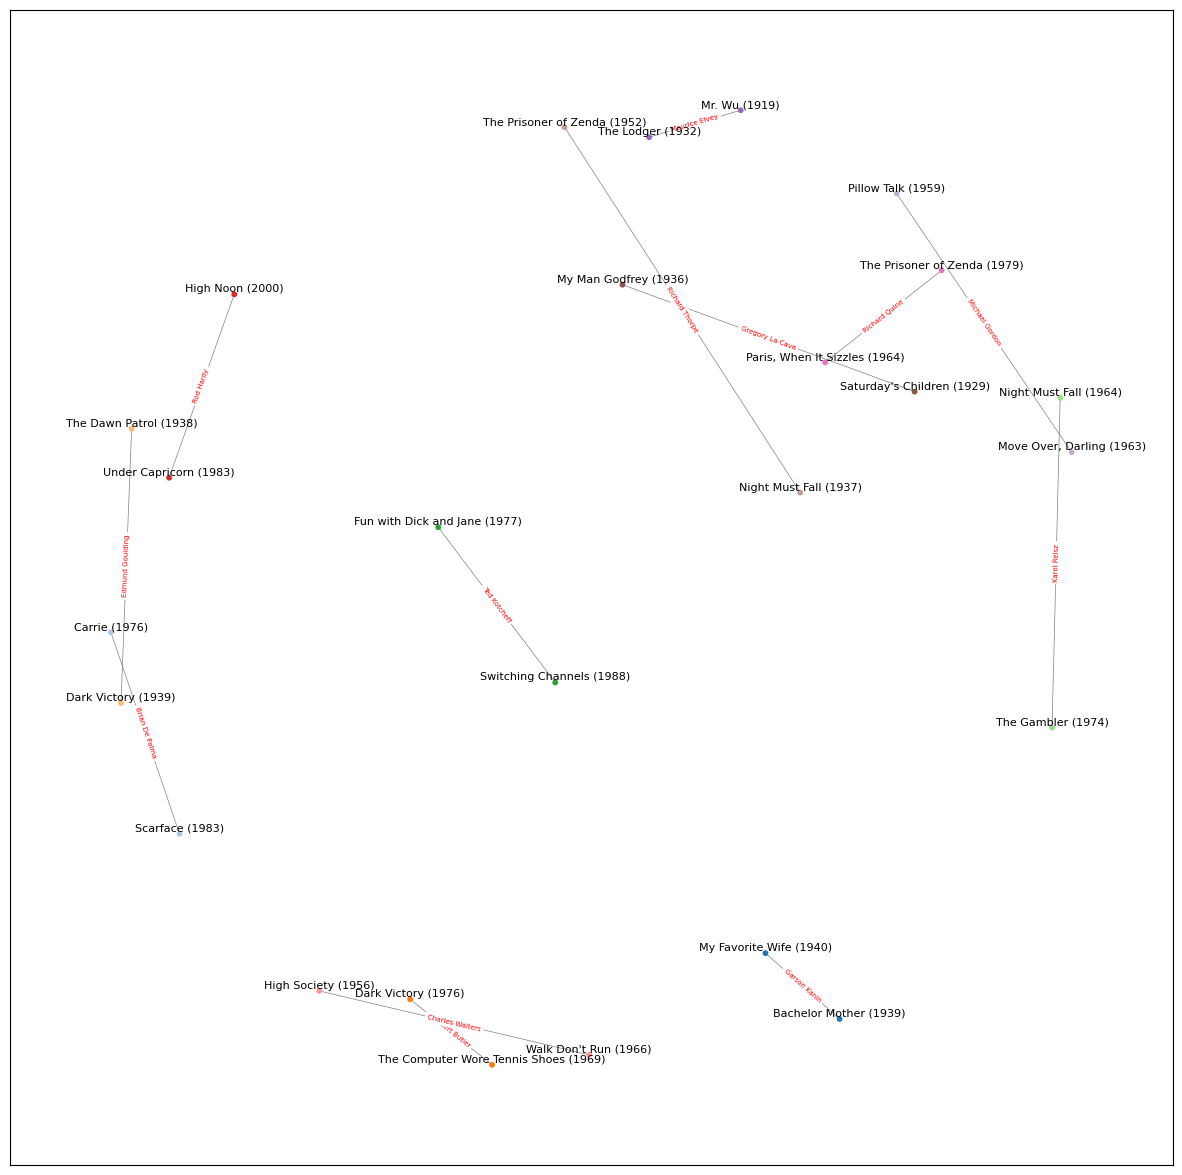

In [14]:
G_copy_3 = G.copy()

# Find nodes with degree greater than 2
nodes_to_remove = [node for node, degree in dict(G_copy_3.degree()).items() if ( degree != 1)]
print(len(nodes_to_remove))
# Remove the selected nodes
G_copy_3.remove_nodes_from(nodes_to_remove)

plot_graph_networkx(G_copy_3, pos = nx.spring_layout(G_copy_3, k=1),  node_label_size = 8, show_edge_labels = True, edge_label_size=5)

#### Visualising nodes with degree 0

108


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 150 (\x96) missing from current font.



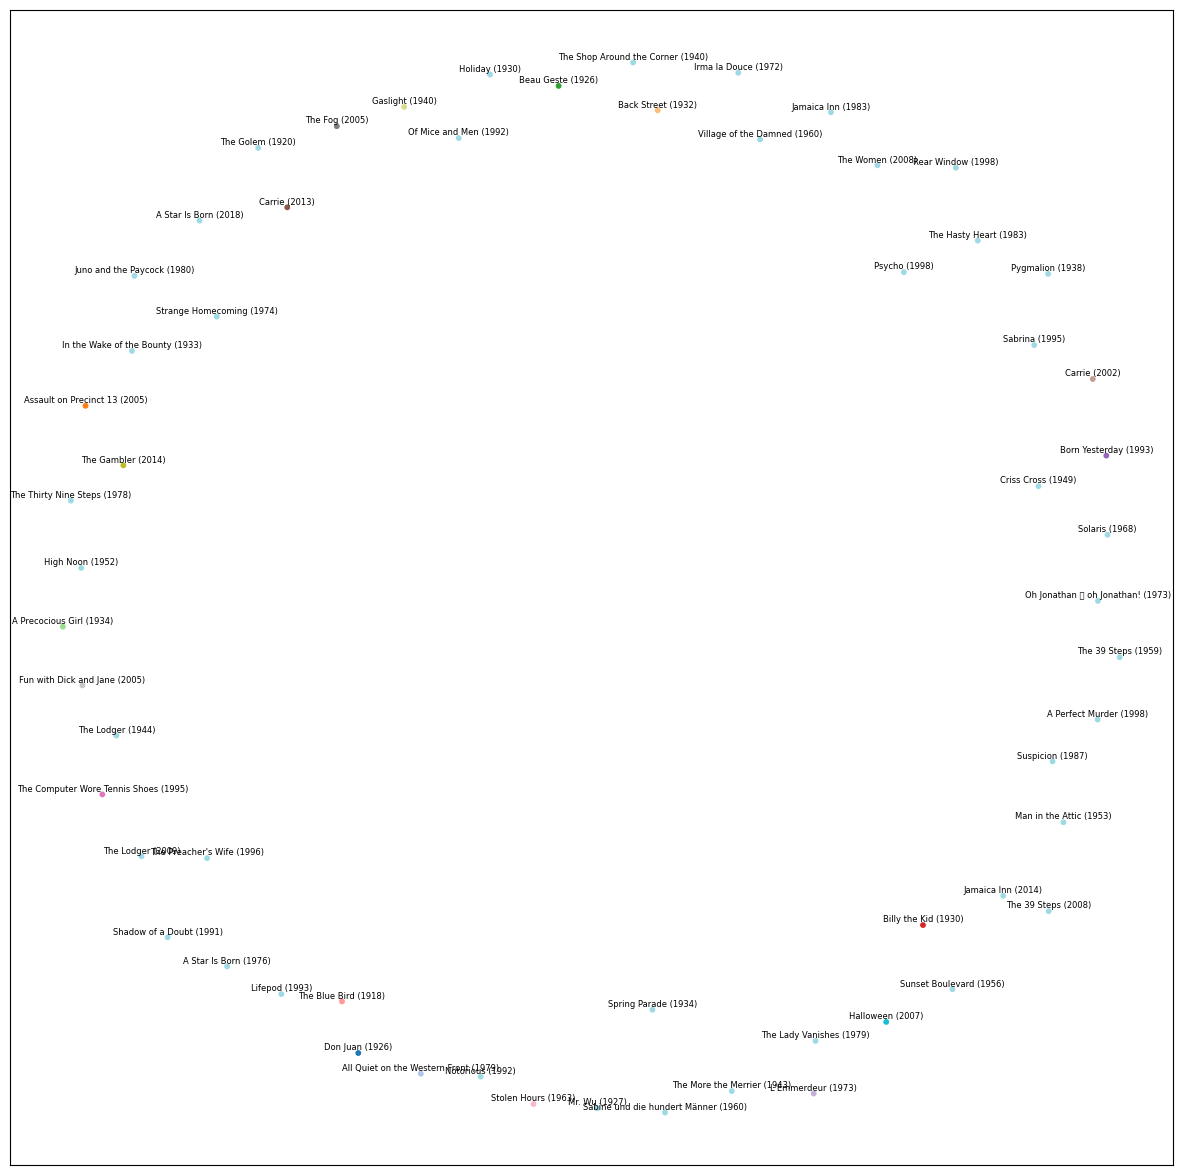

In [15]:
G_copy_3 = G.copy()

# Find nodes with degree greater than 2
nodes_to_remove = [node for node, degree in dict(G_copy_3.degree()).items() if ( degree != 0)]
print(len(nodes_to_remove))
# Remove the selected nodes
G_copy_3.remove_nodes_from(nodes_to_remove)

plot_graph_networkx(G_copy_3, pos = nx.spring_layout(G_copy_3, k=1), node_size=10, node_label_size = 6)

In [16]:
G.number_of_nodes()

168

In [17]:
G.number_of_edges()

308

In [18]:
len(list(nx.connected_components(G)))

87

Visualising a random sample of the graph of 25 nodes

In [20]:
import random

subgraph_nodes = random.sample(list(G.nodes()), k=25)  # Adjust the number of nodes as needed
subgraph = G.subgraph(subgraph_nodes)

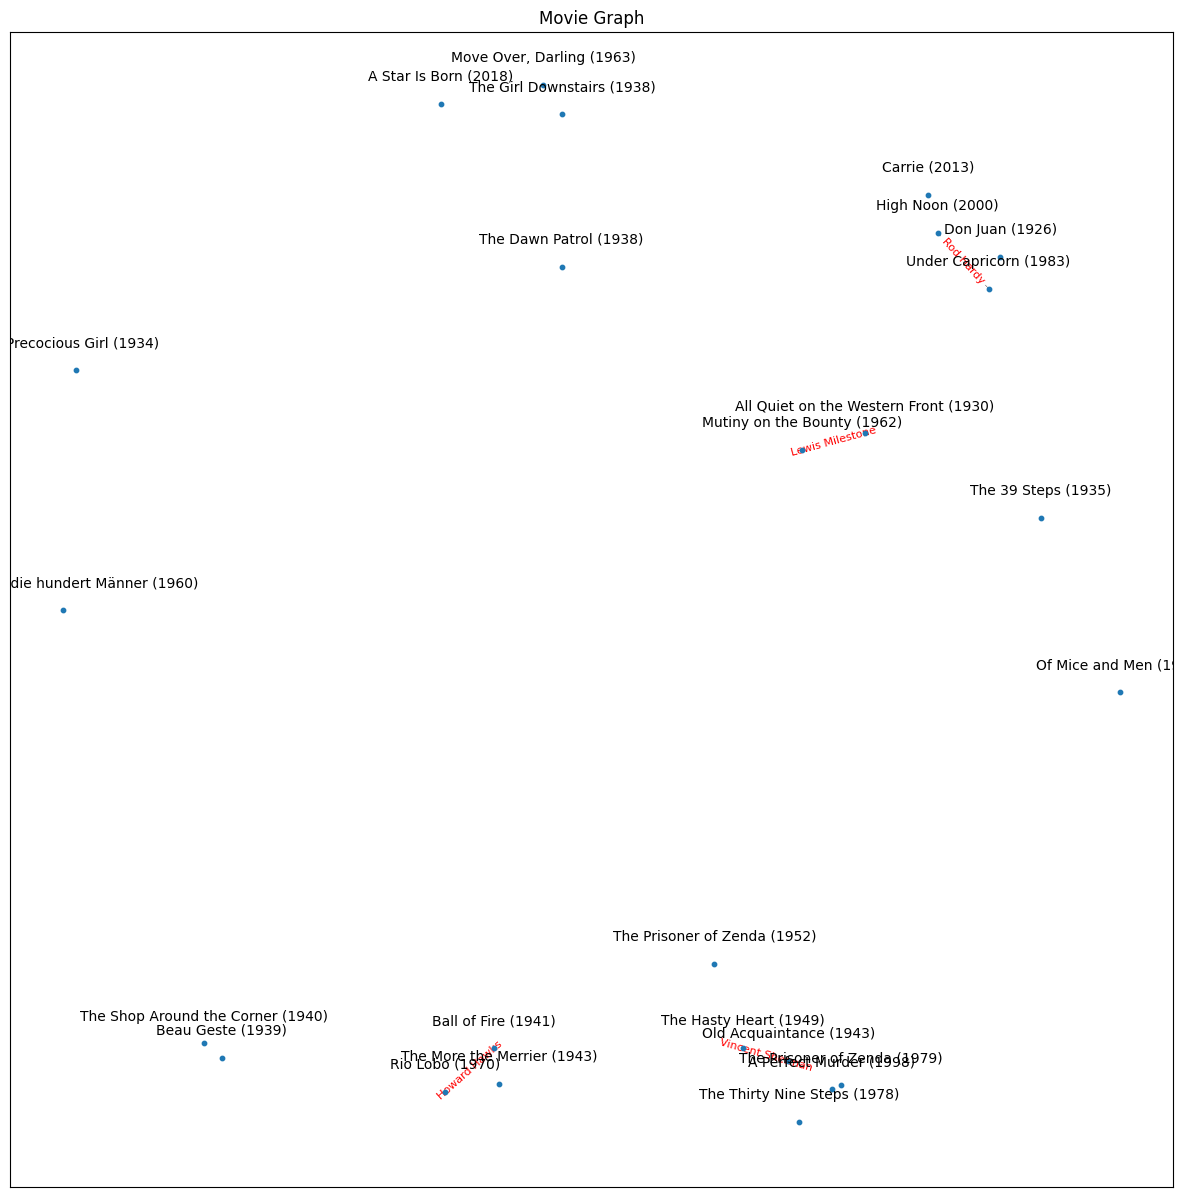

In [21]:
import matplotlib.pyplot as plt

# pos = nx.spring_layout(subgraph, k=1)
nx.spring_layout(G, k=1.0, center=(0.5, 0.5), iterations=50)
plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
ax = plt.gca()
ax.set_facecolor('white')

# Draw nodes with desired node color
# nx.draw_networkx_nodes(G, pos,  node_color=node_colors, node_size=10)
nx.draw_networkx_nodes(subgraph, pos, node_size=10)

# Draw edges with a specific edge width and color
nx.draw_networkx_edges(subgraph, pos, width=0.25, edge_color='black')

# Add labels for nodes
node_labels = {node: data.get("label", "") for node, data in subgraph.nodes(data=True)}
nx.draw_networkx_labels(subgraph, {k: (x, y + 0.05) for k, (x, y) in pos.items()}, font_size=10)

# Add labels for edges
edge_labels = {(u, v): data.get("label", "") for u, v, data in subgraph.edges(data=True)}
nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=edge_labels, font_size=8, font_color='red')



# Turn off axis labels and display the plot
ax.set_xticks([])  # Turn off x-axis labels
ax.set_yticks([])  # Turn off y-axis labels
plt.title('Movie Graph')

plt.show()





Characteristics of the network

In [23]:
# Characteristics of the network
print(f"Nodes : {G.number_of_nodes()}")
print(f"Edges : {G.number_of_edges()}")

# Find connected components
connected_components = list(nx.connected_components(G))

print(f"Number of connected components : {len(connected_components)}")


degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
max_degree = max(degree_sequence)
min_degree = min(degree_sequence)
average_degree = sum(degree_sequence) / len(degree_sequence)
print(f"Max Degree: {max_degree}")
print(f"Min Degree: {min_degree}")
print(f"Average Degree: {average_degree:.2f}")

# Connected Components
components = list(nx.connected_components(G))
largest_component = max(components, key=len)
num_connected_components = len(components)
print(f"Size of Largest Component: {len(largest_component)}")
print(f"Number of Connected Components: {num_connected_components}")

# degree assortativity coefficient
degree_assortativity = nx.degree_assortativity_coefficient(G)
print(f"Degree Assortativity Coefficient: {degree_assortativity:.4f}")

# Calculate the average clustering coefficient
average_clustering = nx.average_clustering(G)
print("Average Clustering Coefficient:", average_clustering)

Nodes : 168
Edges : 308
Number of connected components : 87
Max Degree: 15
Min Degree: 0
Average Degree: 3.67
Size of Largest Component: 16
Number of Connected Components: 87
Degree Assortativity Coefficient: 1.0000
Average Clustering Coefficient: 0.4880952380952381
